In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#matplotlib inline: notebook을 실행한 브라우저에서 바로 그림을 볼 수 있도록 해준다

In [3]:
from sklearn.datasets import load_boston
boston=load_boston()

C:\Users\youngchae\Anaconda3\envs\yc\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housi

In [4]:
X = boston['data']

Y = boston['target'] #target은 주택 가격

X_names = boston['feature_names']

total_data = np.concatenate([X,Y.reshape(-1,1)],axis=1)

total_feature_names = np.append(X_names,'Y')

total_data = pd.DataFrame(total_data,columns = total_feature_names )

total_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [32]:
total_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [41]:
head_total=total_data.iloc[:,-5:]

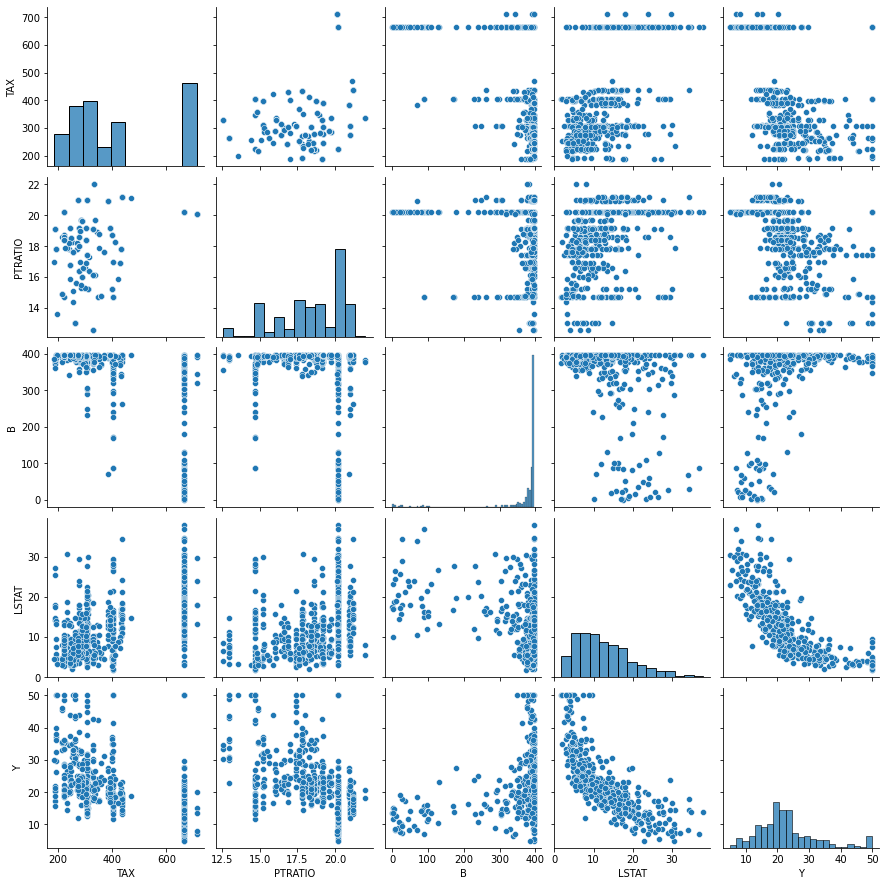

In [42]:
sns.pairplot(head_total)

In [8]:
num_temp=round(total_data.shape[0]*0.7)
TMEP_X = total_data.iloc[:num_temp,:-1]
TEMP_Y = total_data.iloc[:num_temp,-1]

In [6]:
EMP_Y = total_data.iloc[:num_temp,-1]
true_num_train = round(TMEP_X.shape[0]*0.7)
Train_X = TMEP_X.iloc[:true_num_train,:]
Vali_X = TMEP_X.iloc[true_num_train:,:]

In [9]:
Train_Y = TEMP_Y.iloc[:true_num_train]
Vali_Y = TEMP_Y.iloc[true_num_train:]

In [10]:
Test_X = total_data.iloc[num_temp:,:-1]
Test_Y = total_data.iloc[num_temp:,-1]

In [11]:
def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test))
    

In [12]:
from sklearn.neighbors import KNeighborsRegressor as knn


K = [1,3,5,7,9,11]

MAPE_SET = []

for k in K:
    
    KNN = knn(n_neighbors=k)
    
    KNN.fit(Train_X,Train_Y)

    val_pred = KNN.predict(Vali_X)

    mape_result = MAPE(Vali_Y,val_pred)
    
    MAPE_SET.append(mape_result)

In [51]:
Vali_X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
248,0.16439,22.0,5.86,0.0,0.431,6.433,49.1,7.8265,7.0,330.0,19.1,374.71,9.52
249,0.19073,22.0,5.86,0.0,0.431,6.718,17.5,7.8265,7.0,330.0,19.1,393.74,6.56
250,0.14030,22.0,5.86,0.0,0.431,6.487,13.0,7.3967,7.0,330.0,19.1,396.28,5.90
251,0.21409,22.0,5.86,0.0,0.431,6.438,8.9,7.3967,7.0,330.0,19.1,377.07,3.59
252,0.08221,22.0,5.86,0.0,0.431,6.957,6.8,8.9067,7.0,330.0,19.1,386.09,3.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,0.02899,40.0,1.25,0.0,0.429,6.939,34.5,8.7921,1.0,335.0,19.7,389.85,5.89
350,0.06211,40.0,1.25,0.0,0.429,6.490,44.4,8.7921,1.0,335.0,19.7,396.90,5.98
351,0.07950,60.0,1.69,0.0,0.411,6.579,35.9,10.7103,4.0,411.0,18.3,370.78,5.49
352,0.07244,60.0,1.69,0.0,0.411,5.884,18.5,10.7103,4.0,411.0,18.3,392.33,7.79


In [50]:
val_pred

array([21.20909091, 25.3       , 25.3       , 25.9       , 25.9       ,
       25.50909091, 27.38181818, 28.73636364, 35.55454545, 23.84545455,
       23.19090909, 23.19090909, 24.12727273, 23.54545455, 23.54545455,
       21.84545455, 23.54545455, 23.33636364, 22.06363636, 23.33636364,
       23.94545455, 26.87272727, 24.98181818, 23.73636364, 26.87272727,
       26.00909091, 25.01818182, 23.34545455, 23.34545455, 25.73636364,
       25.01818182, 25.87272727, 32.62727273, 28.17272727, 28.96363636,
       36.30909091, 31.18181818, 25.66363636, 34.95454545, 24.42727273,
       22.71818182, 25.19090909, 35.58181818, 35.58181818, 35.58181818,
       26.62727273, 26.17272727, 26.37272727, 24.43636364, 23.2       ,
       31.01818182, 31.23636364, 29.96363636, 21.39090909, 25.3       ,
       25.3       , 25.49090909, 26.87272727, 26.        , 26.        ,
       29.18181818, 25.20909091, 27.09090909, 23.49090909, 20.54545455,
       30.21818182, 23.17272727, 24.93636364, 21.03636364, 24.57

In [48]:
MAPE_SET

[0.25070572160547455,
 0.23707114025922693,
 0.23721532962080275,
 0.23717755754958572,
 0.23528898148160002,
 0.22820679024874949]

In [13]:
best = np.where(MAPE_SET == min(MAPE_SET))[0][0]
#np.where: 조건 만족하는 위치 인덱스 찾기

In [14]:
K[best]

11

In [15]:
basic_knn = knn()

In [16]:
basic_knn.fit(Train_X,Train_Y)

KNeighborsRegressor()

In [17]:
test_pred_basic = basic_knn.predict(Test_X)

In [18]:
best_k = K[best]

In [19]:
best_knn = knn(n_neighbors=best_k)

In [20]:
best_knn.fit(Train_X,Train_Y)

KNeighborsRegressor(n_neighbors=11)

In [21]:
test_pred = best_knn.predict(Test_X)

In [22]:
MAPE(Test_Y,test_pred)

0.447317027292802

In [23]:
MAPE(Test_Y,test_pred_basic)

0.3999301690771256

In [24]:
from sklearn.neighbors import KNeighborsRegressor as knn

In [25]:
KNN = knn(n_neighbors=5)
KNN2 = knn(n_neighbors=10)

In [26]:
KNN.fit(Train_X,Train_Y)
KNN2.fit(Train_X,Train_Y)

KNeighborsRegressor(n_neighbors=10)

In [27]:
pred1 = KNN.predict(Test_X)
pred2 = KNN2.predict(Test_X)

In [28]:
Train_pred1 = KNN.predict(Train_X)
Train_pred2 = KNN2.predict(Train_X)

In [29]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE

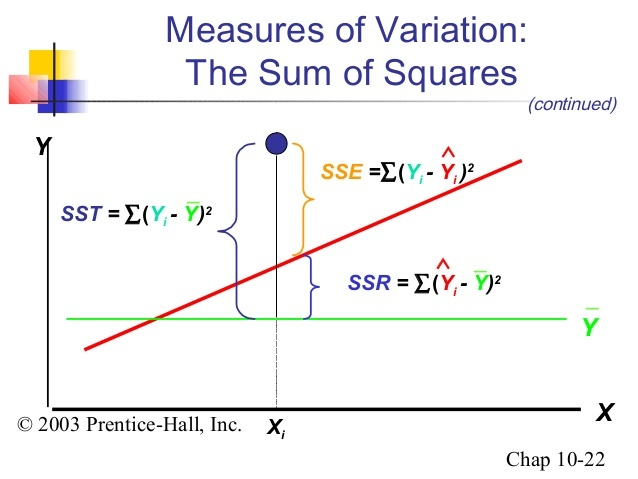


SST(실제 관측값과 관측값 평균값 차이의 제곱 합)
SSR(회귀식으로 예측한 값과 평균값 차이의 제곱 합)
SSE(실제 관측값과 회귀식으로 예측한 값 차이의 제곱 합)
SSR은 크고 SSE는 작기를 원한다.

시계열 예측 지표
MSE(Mean Squared Error)
:SSE를 자유도로 나누어준 값
 MSE가 크다=데이터수가 많다=차이가 크다

MAE(Mean Absolute Error)
:실제 관측값과 회귀식으로 예측한 값 차이를 제곱 합이 아닌 절대값의 합을 해준 것

MAPE(Mean Absolute Percentage Error)
:MAPE는 MAE에서 실제 관측값과 회귀식으로 예측한 값 차이를 회귀식으로 예측한 값으로 나눈 절대값의 합
MAE는 한없이 커질 수 있는데, MAPE는 최대 크기가 제한되므로 이를 보완한 개념

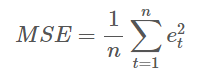
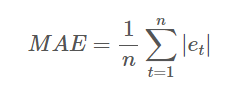
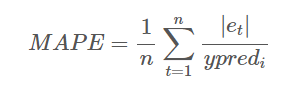


In [30]:
print(MAPE(Test_Y, pred1)*100)
print(MAPE(Test_Y, pred2)*100)

39.99301690771256
43.62880550991671


In [31]:
print(MAPE(Train_Y, Train_pred1)*100)
print(MAPE(Train_Y, Train_pred2)*100)

13.184938358191964
17.35371376806372
